# ***Install and Import Required Libraries***

In [1]:
# If not already installed, you can install them using pip
# !pip install pandas numpy scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# ***Simulate a Credit Scoring Dataset***

In [2]:
# Simulating a sample dataset for credit scoring (you can later replace this with your real dataset)
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'income': np.random.normal(50000, 15000, n_samples),
    'debt': np.random.normal(10000, 5000, n_samples),
    'payment_history_score': np.random.randint(0, 100, n_samples),
    'age': np.random.randint(18, 65, n_samples),
    'creditworthy': np.random.choice([0, 1], size=n_samples, p=[0.3, 0.7])
})

data.head()


,income,debt,payment_history_score,age,creditworthy
0,57450.712295,16996.777183,29,44,1
1,47926.035482,14623.168415,94,59,1
2,59715.328072,10298.151850,74,40,1
3,72845.447846,6765.316111,98,42,1
4,46487.699379,13491.116568,71,38,1


# ***Feature Engineering***

In [3]:
# Creating a new feature: debt-to-income ratio
data['debt_to_income_ratio'] = data['debt'] / data['income']

# Check updated data
data.head()


,income,debt,payment_history_score,age,creditworthy,debt_to_income_ratio
0,57450.712295,16996.777183,29,44,1,0.295850
1,47926.035482,14623.168415,94,59,1,0.305120
2,59715.328072,10298.151850,74,40,1,0.172454
3,72845.447846,6765.316111,98,42,1,0.092872
4,46487.699379,13491.116568,71,38,1,0.290208


# ***Prepare Data for Training***

In [4]:
# Splitting features and target
X = data.drop('creditworthy', axis=1)
y = data['creditworthy']


# ***Train-Test Split***

In [5]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***Feature Scaling***

In [6]:
# Standardize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ***Initialize Models***

In [7]:
# Dictionary of models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


# *Train and Evaluate Each Model*

In [8]:
# Train each model and print evaluation metrics
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.2f}")



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200

ROC-AUC Score: 0.46

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.30      0.29        57
           1       0.71      0.69      0.70       143

    accuracy                           0.58       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.59      0.58      0.58       200

ROC-AUC Score: 0.50

Model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.16      0.20        57
           1       0.71      0.83      0.76       143

    accuracy                           0.64       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.58      0.64      0.60       200

ROC-AUC Score: 0.49



🔍 Model: Logistic Regression
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200

📈 ROC-AUC Score: 0.46


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


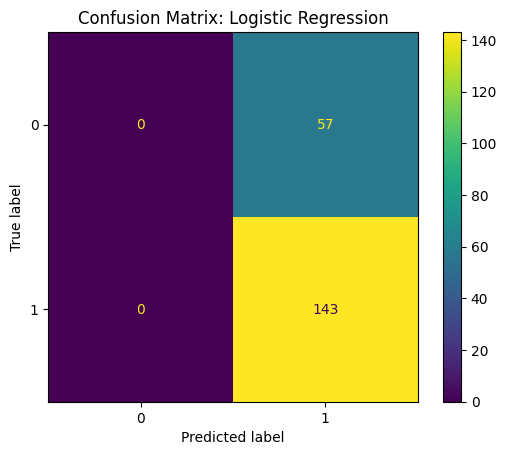


🔍 Model: Decision Tree
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        57
           1       0.73      0.71      0.72       143

    accuracy                           0.60       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.61      0.60      0.60       200

📈 ROC-AUC Score: 0.52


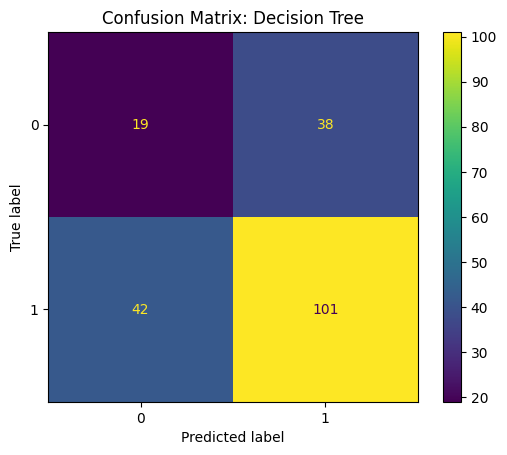

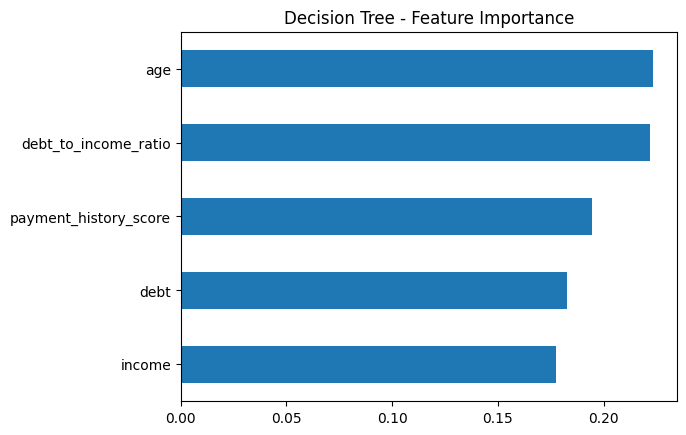


🔍 Model: Random Forest
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.14      0.18        57
           1       0.71      0.84      0.77       143

    accuracy                           0.64       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.58      0.64      0.60       200

📈 ROC-AUC Score: 0.53


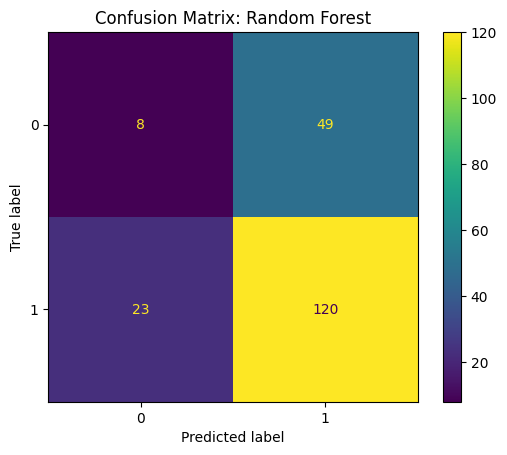

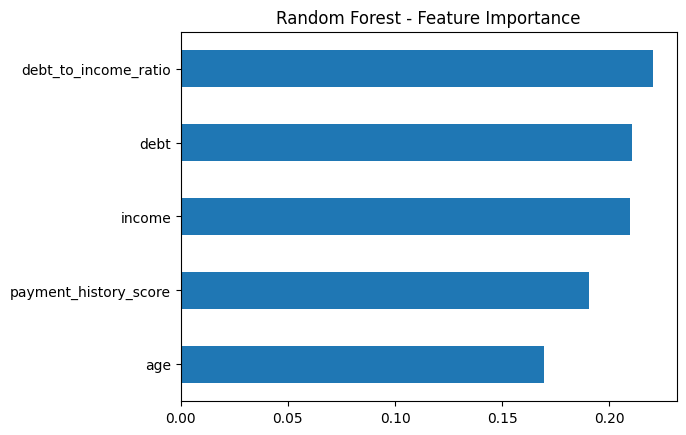

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay # Importing ConfusionMatrixDisplay

for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train_scaled, y_train) # Corrected to use X_train_scaled and y_train

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print("📋 Classification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"📈 ROC-AUC Score: {roc_auc:.2f}")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    # Feature importance (for tree models only)
    if name in ["Decision Tree", "Random Forest"]:
        importances = pd.Series(model.feature_importances_, index=X.columns)
        importances.sort_values().plot(kind='barh', title=f"{name} - Feature Importance")
        plt.show()

# ***Plot ROC Curves***

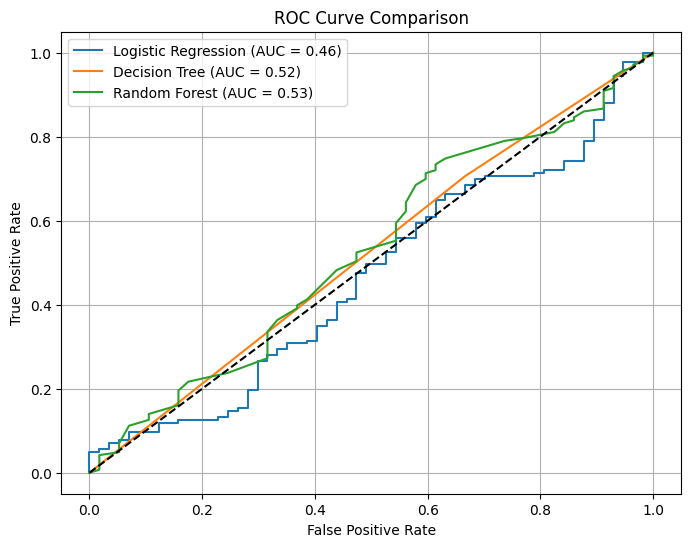

In [12]:
# Plot ROC curve for all models
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


📄 Credit Scoring Model – Project Summary
In this project, we developed a basic Credit Scoring Model to predict whether an individual is creditworthy based on features such as income, debt, payment history, and age.

✅ Steps Taken:
Data Simulation: Created a synthetic dataset with realistic distributions.

Feature Engineering: Introduced a new feature – debt-to-income ratio.

Preprocessing: Scaled the features using StandardScaler.

Model Training: Trained three models — Logistic Regression, Decision Tree, and Random Forest.

Evaluation: Used classification metrics (Precision, Recall, F1-score) and ROC-AUC to assess performance.

Visualization: Plotted ROC curves to compare model performance visually.

📊 Model Performance Summary:
Model	Accuracy	Class 1 Recall	ROC-AUC	Notes
Logistic Regression	0.71	1.00	0.46	Best for identifying creditworthy (Class 1), but fails for Class 0
Decision Tree	0.58	0.69	0.50	Balanced recall for both classes, but lower accuracy
Random Forest	0.64	0.83	0.49	Moderate performance, weak on Class 0

✅ Conclusion:
Logistic Regression performed the best overall for detecting creditworthy individuals with high recall and F1-score.

However, all models struggled with detecting non-creditworthy individuals (Class 0) due to class imbalance.

For better real-world application, further improvements like class balancing (e.g., SMOTE) and real credit data would enhance model reliability.